In [1]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt

In [2]:
messages = pd.read_csv(r'D:\Datasets\spam1.csv', encoding = 'cp1252')

In [3]:
messages.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
messages.isnull().sum()

v1               0
v2               0
Unnamed: 2    6720
Unnamed: 3    6760
Unnamed: 4    6768
dtype: int64

In [5]:
messages.shape

(6776, 5)

In [6]:
messages = messages.iloc[:, [0,1]]
messages.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
messages.rename(columns = {'v1': 'label', 'v2':'message'}, inplace = True)
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
messages.label = messages.label.replace({'ham':0, 'spam':1})
messages.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
messages.message = messages.message.str.lower()
messages.head()

,label,message
0,0,"go until jurong point, crazy.. available only ..."
1,0,ok lar... joking wif u oni...
2,1,free entry in 2 a wkly comp to win fa cup fina...
3,0,u dun say so early hor... u c already then say...
4,0,"nah i don't think he goes to usf, he lives aro..."


In [10]:
# before creating the TDM i have converted by data in same case
# lets also get rid of stop words and also punctuations
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\harsh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [12]:
len(stopwords.words('english'))

179

In [13]:
# we have only seen the stopwords, we haven't removed them

In [14]:
import string 
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [15]:
# now we will get rid of stopwords and punctuation

In [16]:
def text_process(mess):            ### creating a function
    """                                                        ## a docstring
    1. remove the punctuation
    2. remove the stopwords
    3. return the list of clean textwords
    
    """
    nopunc = [char for char in mess if char  not   in string.punctuation]
    nopunc = "".join(nopunc)
    
    return [ word for word in nopunc.split() if word not in stopwords.words("english")]

In [17]:
example = " this is just and example to @ show ! that its removes the stop words and also punctuations"

In [18]:
text_process(example)

['example', 'show', 'removes', 'stop', 'words', 'also', 'punctuations']

In [19]:
messages['message'].apply(text_process)

0       [go, jurong, point, crazy, available, bugis, n...
1                          [ok, lar, joking, wif, u, oni]
2       [free, entry, 2, wkly, comp, win, fa, cup, fin...
3           [u, dun, say, early, hor, u, c, already, say]
4       [nah, dont, think, goes, usf, lives, around, t...
                              ...                        
6771    [2nd, time, tried, 2, contact, u, u, å£750, po...
6772                   [ì, b, going, esplanade, fr, home]
6773                     [pity, mood, soany, suggestions]
6774    [guy, bitching, acted, like, id, interested, b...
6775                                   [rofl, true, name]
Name: message, Length: 6776, dtype: object

In [20]:
# lets build our TDM
# before building TDM, we need to get the count of every word

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
bow_transformer =    CountVectorizer(analyzer = text_process   ).fit(messages["message"])


In [22]:
bow_transformer.vocabulary_

{'go': 3744,
 'jurong': 4640,
 'point': 6371,
 'crazy': 2459,
 'available': 1373,
 'bugis': 1836,
 'n': 5620,
 'great': 3841,
 'world': 9100,
 'la': 4799,
 'e': 2984,
 'buffet': 1834,
 'cine': 2174,
 'got': 3801,
 'amore': 1140,
 'wat': 8863,
 'ok': 5936,
 'lar': 4838,
 'joking': 4608,
 'wif': 8996,
 'u': 8527,
 'oni': 5968,
 'free': 3535,
 'entry': 3119,
 '2': 414,
 'wkly': 9052,
 'comp': 2290,
 'win': 9010,
 'fa': 3257,
 'cup': 2514,
 'final': 3381,
 'tkts': 8304,
 '21st': 434,
 'may': 5283,
 '2005': 421,
 'text': 8143,
 '87121': 836,
 'receive': 6769,
 'questionstd': 6660,
 'txt': 8511,
 'ratetcs': 6713,
 'apply': 1226,
 '08452810075over18s': 71,
 'dun': 2970,
 'say': 7123,
 'early': 2991,
 'hor': 4171,
 'c': 1885,
 'already': 1114,
 'nah': 5627,
 'dont': 2878,
 'think': 8217,
 'goes': 3758,
 'usf': 8657,
 'lives': 5000,
 'around': 1277,
 'though': 8236,
 'freemsg': 3543,
 'hey': 4067,
 'darling': 2578,
 '3': 518,
 'weeks': 8916,
 'word': 9086,
 'back': 1424,
 'id': 4290,
 'like': 4

In [23]:
len(bow_transformer.vocabulary_)

# count of total number of unique words
# which means if i convert into TDM, TDM should have 9422 cols

9422

In [24]:
messages_bow = bow_transformer.transform(messages.message)

# creating the term document matrix

In [25]:
messages_bow.shape

(6776, 9422)

In [26]:
type(messages_bow)

scipy.sparse.csr.csr_matrix

In [27]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(messages_bow, messages.label)

In [28]:
print(x_train.shape)
print(y_train.shape)

(5082, 9422)
(5082,)


In [29]:
from sklearn.naive_bayes import MultinomialNB

nb_spam = MultinomialNB()

In [30]:
nb_spam.fit(x_train, y_train)

MultinomialNB()

In [31]:
pred = nb_spam.predict(x_test)

In [32]:
from sklearn.metrics import confusion_matrix
tab1 = confusion_matrix(y_test, pred)
tab1


array([[1431,   26],
       [  12,  225]], dtype=int64)

In [33]:
tab1.diagonal().sum()*100 / tab1.sum()

97.75678866587957

In [34]:
# from sklearn.tree import DecisionTreeClassifier
# dt = DecisionTreeClassifier(max_depth = 10,
                          # min_samples_split = 150)

In [35]:
# dt.fit(x_train, y_train)

In [36]:
pip install wordcloud

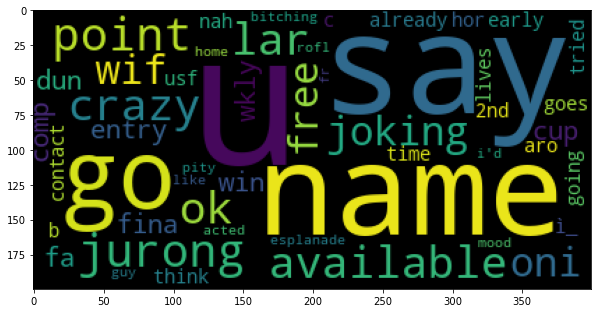

In [37]:
from wordcloud import WordCloud  

cloud  = WordCloud(stopwords = stopwords.words("english"), max_words= 50).generate(str(messages['message']) )
plt.figure(figsize=(10 , 10)) 
plt.imshow(cloud)


In [38]:
spam_df = messages[messages.label == 1]

In [39]:
ham_df = messages[messages.label == 0]

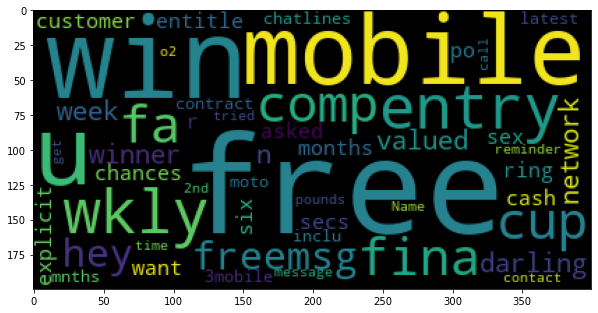

In [40]:
cloud  = WordCloud(stopwords = stopwords.words("english"), max_words= 50).generate(str(spam_df['message']) )
plt.figure(figsize=(10 , 10)) 
plt.imshow(cloud)

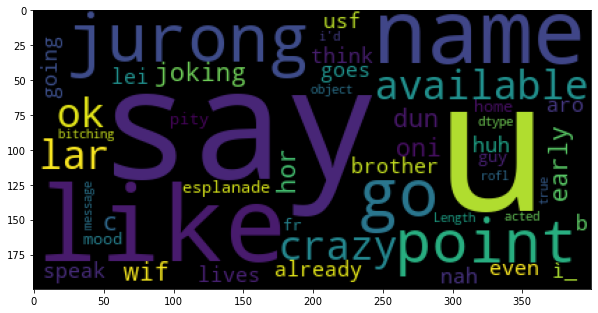

In [41]:
cloud  = WordCloud(stopwords = stopwords.words("english"), max_words= 50).generate(str(ham_df['message']) )
plt.figure(figsize=(10 , 10)) 
plt.imshow(cloud)

# amazon case study

In [42]:
amz = pd.read_csv(r'D:\Datasets\amazonreviews.tsv', sep = '\t') 

In [43]:
amz.head(2)

,label,review
0,pos,Stuning even for the non-gamer: This sound tra...
1,pos,The best soundtrack ever to anything.: I'm rea...


In [44]:
amz.isnull().sum()

label     0
review    0
dtype: int64

In [45]:
#amz.info()

In [46]:
amz.label.replace({'pos':1, 'neg':0}, inplace = True)
amz.head()

,label,review
0,1,Stuning even for the non-gamer: This sound tra...
1,1,The best soundtrack ever to anything.: I'm rea...
2,1,Amazing!: This soundtrack is my favorite music...
3,1,Excellent Soundtrack: I truly like this soundt...
4,1,"Remember, Pull Your Jaw Off The Floor After He..."


In [47]:
amz.review = amz.review.str.lower()
amz.head(2)

,label,review
0,1,stuning even for the non-gamer: this sound tra...
1,1,the best soundtrack ever to anything.: i'm rea...


In [48]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [49]:
len(stopwords.words('english'))

179

In [50]:
import string 
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [51]:
def text_process(mess):            ### creating a function
    """                                                        ## a docstring
    1. remove the punctuation
    2. remove the stopwords
    3. return the list of clean textwords
    
    """
    nopunc = [char for char in mess if char  not   in string.punctuation]
    nopunc = "".join(nopunc)
    
    return [ word for word in nopunc.split() if word not in stopwords.words("english")]

In [52]:
amz.review.apply(text_process)

0       [stuning, even, nongamer, sound, track, beauti...
1       [best, soundtrack, ever, anything, im, reading...
2       [amazing, soundtrack, favorite, music, time, h...
3       [excellent, soundtrack, truly, like, soundtrac...
4       [remember, pull, jaw, floor, hearing, youve, p...
                              ...                        
9995    [revelation, life, small, town, america, early...
9996    [great, biography, interesting, journalist, bi...
9997    [interesting, subject, poor, presentation, you...
9998    [dont, buy, box, looked, used, obviously, new,...
9999    [beautiful, pen, fast, delivery, pen, shipped,...
Name: review, Length: 10000, dtype: object

In [53]:
from sklearn.feature_extraction.text import CountVectorizer
bow_transformer =    CountVectorizer(analyzer = text_process   ).fit(amz["review"])

In [54]:
bow_transformer.vocabulary_

{'stuning': 34189,
 'even': 12595,
 'nongamer': 24278,
 'sound': 33125,
 'track': 36325,
 'beautiful': 3941,
 'paints': 25720,
 'senery': 31523,
 'mind': 22665,
 'well': 38818,
 'would': 39538,
 'recomend': 29102,
 'people': 26193,
 'hate': 16497,
 'vid': 38116,
 'game': 14941,
 'music': 23568,
 'played': 26823,
 'chrono': 6964,
 'cross': 8903,
 'games': 14971,
 'ever': 12608,
 'best': 4239,
 'backs': 3531,
 'away': 3391,
 'crude': 8936,
 'keyboarding': 19746,
 'takes': 34897,
 'fresher': 14581,
 'step': 33794,
 'grate': 15807,
 'guitars': 16080,
 'soulful': 33109,
 'orchestras': 25171,
 'impress': 17969,
 'anyone': 2530,
 'cares': 6094,
 'listen': 20917,
 'soundtrack': 33147,
 'anything': 2538,
 'im': 17820,
 'reading': 28886,
 'lot': 21215,
 'reviews': 30044,
 'saying': 30943,
 'figured': 13711,
 'id': 17672,
 'write': 39594,
 'review': 30033,
 'disagree': 10372,
 'bit': 4457,
 'opinino': 25096,
 'yasunori': 39747,
 'mitsudas': 22881,
 'ultimate': 37007,
 'masterpiece': 21946,
 'time

In [55]:
len(bow_transformer.vocabulary_)

40040

In [56]:
amz_bow = bow_transformer.transform(amz.review)

In [57]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(amz_bow, amz.label)

In [58]:
from sklearn.naive_bayes import MultinomialNB

nb_amz = MultinomialNB()

In [59]:
nb_amz.fit(x_train, y_train)

MultinomialNB()

In [60]:
pred = nb_amz.predict(x_test)

In [61]:
from sklearn.metrics import confusion_matrix

In [62]:
tab1 = confusion_matrix(y_test, pred)
tab1

array([[1089,  179],
       [ 235,  997]], dtype=int64)

In [63]:
tab1.diagonal().sum()*100/tab1.sum()

83.44

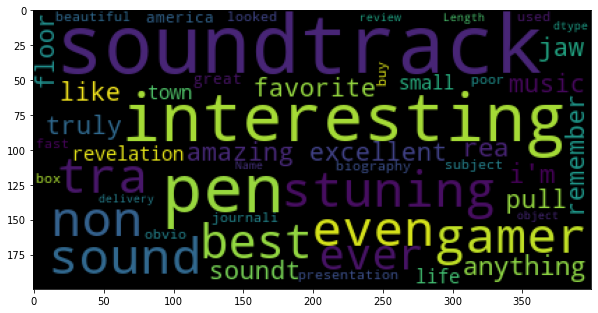

In [64]:
from wordcloud import WordCloud  

cloud  = WordCloud(stopwords = stopwords.words("english"), max_words= 50).generate(str(amz['review']) )
plt.figure(figsize=(10 , 10)) 
plt.imshow(cloud)

In [65]:
amz_pos = amz[amz.label == 1]

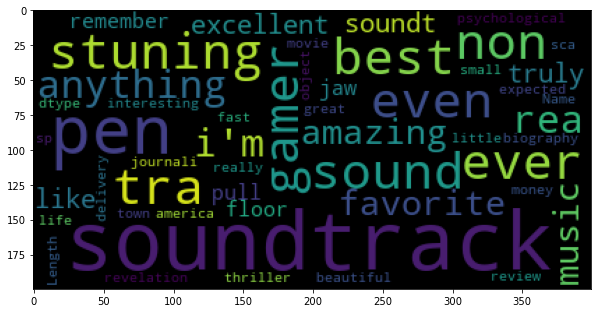

In [66]:
from wordcloud import WordCloud  

cloud  = WordCloud(stopwords = stopwords.words("english"), max_words= 50).generate(str(amz_pos['review']) )
plt.figure(figsize=(10 , 10)) 
plt.imshow(cloud)

In [67]:
amz_neg = amz[amz.label == 0]

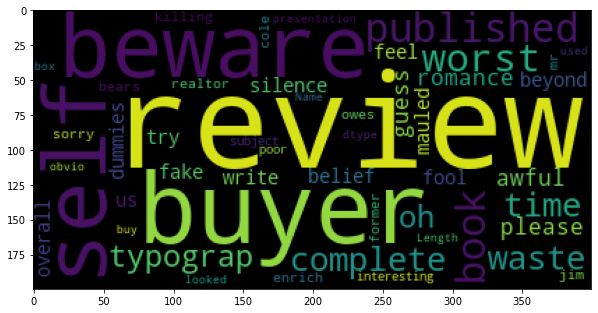

In [68]:
from wordcloud import WordCloud  

cloud  = WordCloud(stopwords = stopwords.words("english"), max_words= 50).generate(str(amz_neg['review']) )
plt.figure(figsize=(10 , 10)) 
plt.imshow(cloud)

# importing vader library

In [69]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')  # pre trained dictionary



[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\harsh\AppData\Roaming\nltk_data...


True

In [70]:
sent = SentimentIntensityAnalyzer()

In [71]:
sent.polarity_scores('this drink is aawesome and i had a heavenly feeling by taking a sip')

{'neg': 0.0, 'neu': 0.621, 'pos': 0.379, 'compound': 0.6705}

In [72]:
sent.polarity_scores('movie was horrible and it was not worth watching')

{'neg': 0.425, 'neu': 0.575, 'pos': 0.0, 'compound': -0.6329}

In [73]:
score = sent.polarity_scores('movie was horrible and it was not worth watching')

In [74]:
score

{'neg': 0.425, 'neu': 0.575, 'pos': 0.0, 'compound': -0.6329}

In [75]:
score.keys()

dict_keys(['neg', 'neu', 'pos', 'compound'])

In [76]:
score['compound']

-0.6329

In [77]:
amz = pd.read_csv(r'D:\Datasets\amazonreviews.tsv', sep = '\t') 

# consider we do not have the label col and only review col and customer has asked whether it is pos or neg overall 

In [78]:
amz.iloc[0,1]

'Stuning even for the non-gamer: This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^'

In [79]:
sent.polarity_scores(amz.iloc[0,1])

{'neg': 0.088, 'neu': 0.669, 'pos': 0.243, 'compound': 0.9454}

In [80]:
empty_list = []
for i in range (0, amz.shape[0]):
    score = sent.polarity_scores(amz.iloc[i, 1])
    compound_score = score['compound']
    empty_list.append(compound_score)

In [81]:
amz['com_score'] = empty_list

In [82]:
amz.head()

,label,review,com_score
0,pos,Stuning even for the non-gamer: This sound tra...,0.9454
1,pos,The best soundtrack ever to anything.: I'm rea...,0.8957
2,pos,Amazing!: This soundtrack is my favorite music...,0.9858
3,pos,Excellent Soundtrack: I truly like this soundt...,0.9814
4,pos,"Remember, Pull Your Jaw Off The Floor After He...",0.9781


In [83]:
amz.com_score.mean()

0.3352067199999999

In [84]:
amz.com_score.describe(percentiles = [.1, .2, .3, .4, .5, .6, .7, .8, .9, 1])

count    10000.000000
mean         0.335207
std          0.676143
min         -0.994500
10%         -0.789750
20%         -0.497140
30%         -0.051600
40%          0.401900
50%          0.669600
60%          0.817600
70%          0.891000
80%          0.935100
90%          0.964800
100%         0.998700
max          0.998700
Name: com_score, dtype: float64

In [85]:
# how many positive and negative scores 

In [86]:
amz[amz.com_score > 0 ].shape

(6795, 3)

In [87]:
amz[amz.com_score < 0 ].shape

(3064, 3)